In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [70]:
#Import csv
iris = pd.read_csv('C:/Users/denisa.trancioveanu/OneDrive - BearingPoint GmbH/Desktop/WebMining_TrancioveanuDenisa/IRIS.csv')
iris
x = iris.iloc[:, [0, 1, 2, 3]].values
iris

sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [71]:
#Nu avem valori lipsa
round(iris.isnull().sum()/len(iris) *100, 2)

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [72]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [73]:
#Datele sunt omogene: coeficientul de omogenitate este sub 30%
#coef = std/mean = 0.14
round(iris.describe(),2)

sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean           5.84         3.05          3.76         1.20
std            0.83         0.43          1.76         0.76
min            4.30         2.00          1.00         0.10
25%            5.10         2.80          1.60         0.30
50%            5.80         3.00          4.35         1.30
75%            6.40         3.30          5.10         1.80
max            7.90         4.40          6.90         2.50

Datele fiind omogene, putem utiliza mai departe in analiza tipul de clusterizare K-Means

In [74]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0            count
species               
Iris-setosa         50
Iris-versicolor     50
Iris-virginica      50

In [75]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

In [76]:
#sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"petal_length").add_legend()
#sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"petal_width").add_legend()
#sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"sepal_length").add_legend()
#plt.show()

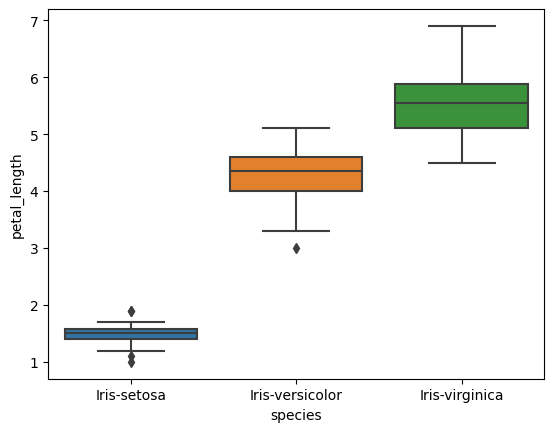

In [77]:
#Boxplot-ul ne arata ca datele sunt omogene
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

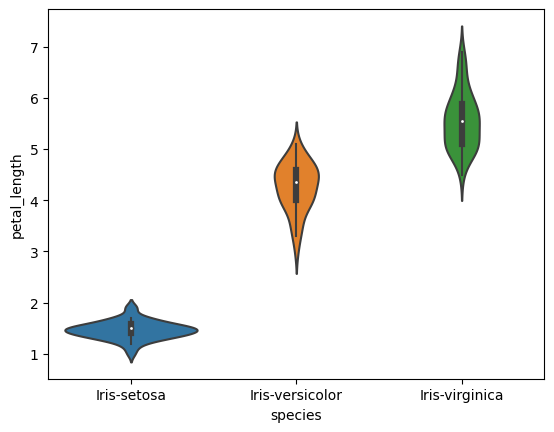

In [78]:
sns.violinplot(x="species",y="petal_length",data=iris)
plt.show()

In [79]:
#Numarul optim de clustere pentru K-Means folosind metoda Elbow
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\denisa.trancioveanu\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\denisa.trancioveanu\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\denisa.trancioveanu\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\denisa.trancioveanu\AppData\Local\anaconda3

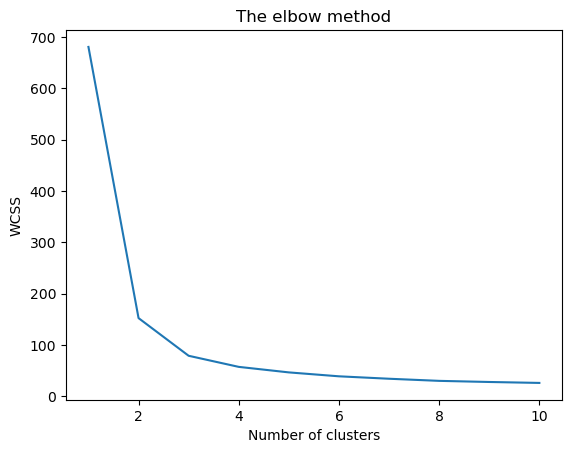

In [80]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [81]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

C:\Users\denisa.trancioveanu\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


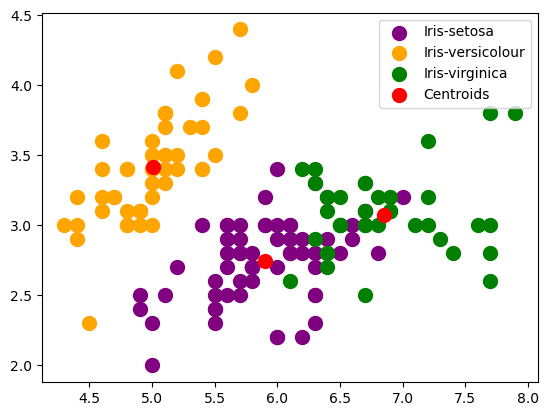

In [82]:
#Vizualizarea clusterelor
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Reprezentarea centroizilor clusterelor
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

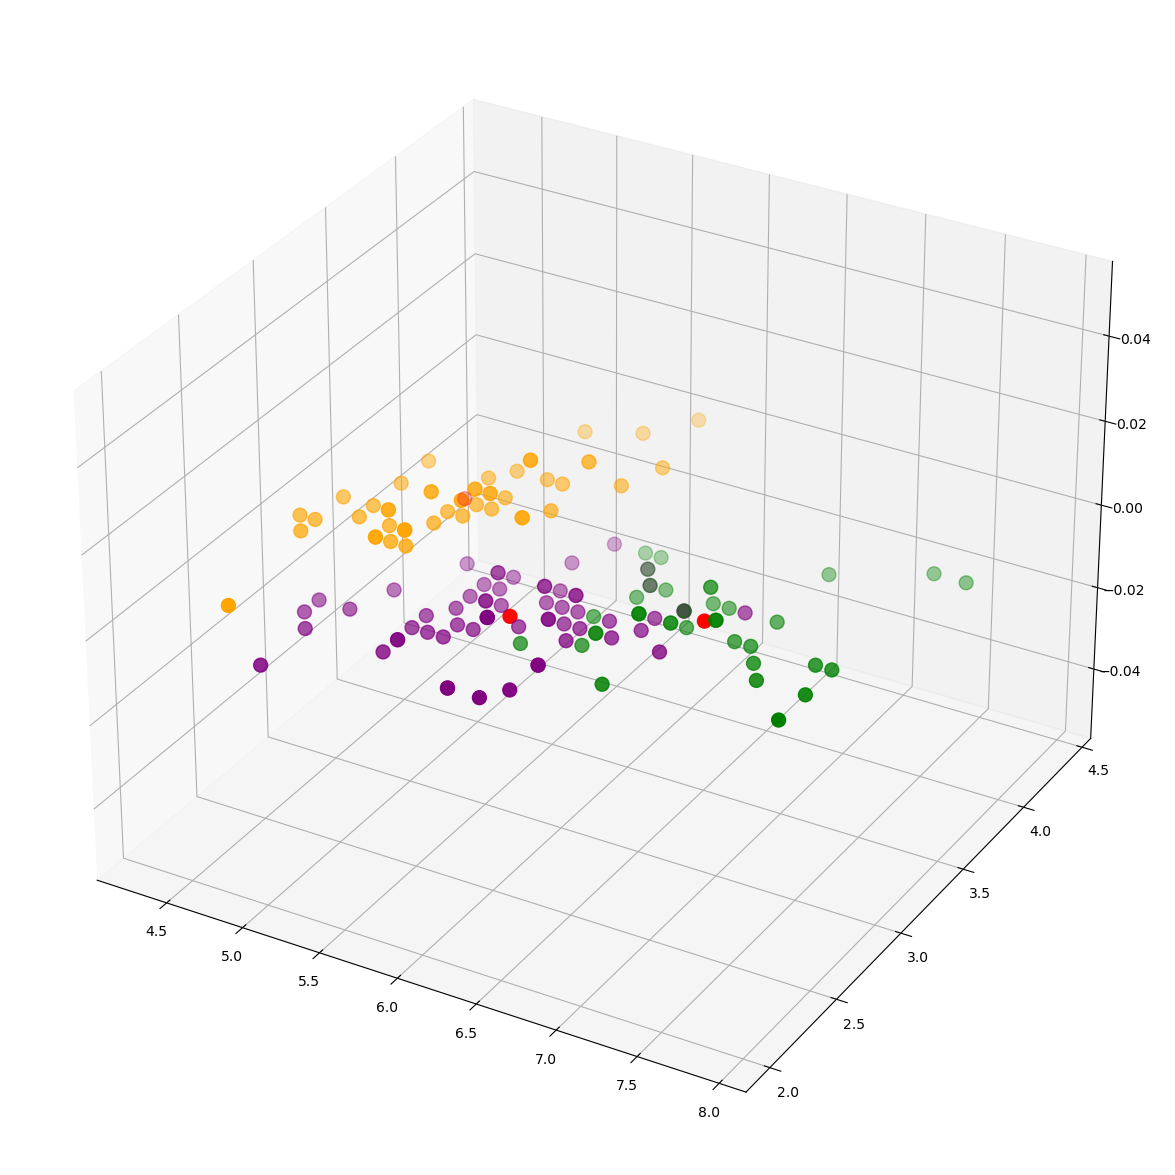

In [83]:
# Reprezentare 3D folosind matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Centroizii clusterelor
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

In [84]:
iris['Cluster'] = kmeans.labels_
iris

sepal_length  sepal_width  petal_length  petal_width         species  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     Cluster  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
145        2  
146        0  
147        2  
148        2  
149        0  

[150 rows x 6 columns]

Din 150 de plante, algoritmul a clasificat corect 134.
Din tabelul de mai jos, se poate observa ca Iris-setosa(1) se caracterizeaza prin petale foarte mici, atat in lungime, cat si in latime.
Iris-virginica (2) are o lungime a petalelor si a sepalelor mare.
Iris-versicolor(0) are o latime a sepalelor mica si o lungime a petalelor mare.

In [85]:
iris.set_index('Cluster')
grouped = iris.groupby(by = 'Cluster').mean().round(2)
grouped

C:\Users\denisa.trancioveanu\AppData\Local\Temp\ipykernel_21800\974422862.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = iris.groupby(by = 'Cluster').mean().round(2)


sepal_length  sepal_width  petal_length  petal_width
Cluster                                                      
0                5.90         2.75          4.39         1.43
1                5.01         3.42          1.46         0.24
2                6.85         3.07          5.74         2.07

In [86]:
iris
iris['Cluster'].value_counts()

0    62
1    50
2    38
Name: Cluster, dtype: int64

In [87]:
iris.drop(['species', 'Cluster'], axis=1, inplace=True)
iris

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [88]:
#Silhouette score are o valoare destul de mare, inseamna ca datele au fost clusterizate corect
silhouette_score(iris, kmeans.labels_).round(2)

0.55